<div style="display: block;margin-left: auto;margin-right: auto;width: 100%;text-align: center;">
<br><a href="https://www.youtube.com/watch?v=XnOAdxOWXWg&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=14"><b> Source</b></a></div>

# 1. Logistic Regression analysis
***

### <center> Theoretical part
    
    - we don't want to get cofused, but logistic regression is type of classification
![](pic/v14/1s.png)

- LITTLE BIT MORE ON TYPE OF <u>CLASSIFICATION</u>, THERE ARE:
    - <b>Decision trees</b> 
        - we take decisions using a tree structure
        - each branch node represents a choice, and leaf node represents a decisions
    - <b>K-nearest neighbor</b>
        - it helps determine what the given object is, based on its similarity to the objects it is compared to
    - <b>Logistic regression</b>
        - a dataset with one or more independent variables is used to determine binary output of the dependent variable

#### <center>EXAMPLE</center>
   
- how long until car breaks down?
![](pic/v14/2s.png)

- we can see that the line has various probability results on each part (from 0 to 1 -> like from 0 to 100%)
- that tells us chances if car is going to break or not

#### LINEAR and LOGISTIC REGRESSION

- here's the graph of how linear regression would be, for a given scenario if we wanted to know wheather the employee would get a promotion or not based on thier rating
![](pic/v14/3s.png)

- for this we can't use linear regression

![](pic/v14/4s.png)

- as we can see, the error value when using this type of data with linear regression would be very big because there's nothing in between
- for this cases, when the dependent variable is categorical, we use logistic regression

#### To understand Logistic Regression we need to understand math behind it!
![](pic/v14/5s.png)

Lets look the equation
![](pic/v14/6s.png)
![](pic/v14/7s.png)

#### Diferences between Linear and Logistic Regression
![](pic/v14/8s.png)


#### Aplication of Logistic Regression
- Weather prediction
    - helps determine the kind of weather that can be expected
- Image categorization
    - identiffies the different components that are present in the image, and helps to categorize the
- Healthcare
    - determines the possibility of patient survival, taking age, ect ...

# 2. Logistic Regression - practical example
***

### Predicting numbers 
- guessing which number is in the certain pic)

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
print("Image Data Shape: {}".format(digits.data.shape))
print("Label Data Shape: {}".format(digits.target.shape))

Image Data Shape: (1797, 64)
Label Data Shape: (1797,)


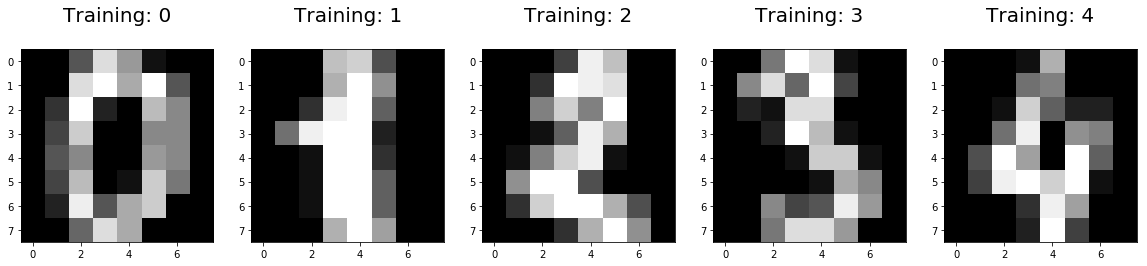

In [4]:
plt.figure(figsize=(20, 4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [6]:
X_train.shape

(1347, 64)

In [7]:
y_train.shape

(1347,)

In [8]:
X_test.shape

(450, 64)

In [9]:
y_test.shape

(450,)

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
print(log_reg.predict(X_test[0].reshape(1, -1)))

[6]


In [12]:
log_reg.predict(X_test[:10])

array([6, 5, 4, 0, 4, 8, 4, 2, 9, 8])

In [13]:
predictions = log_reg.predict(X_test)

score = log_reg.score(X_test, y_test)
score

0.9644444444444444

Text(0.5, 1.0, 'Accuracy Score: 0.9644444444444444')

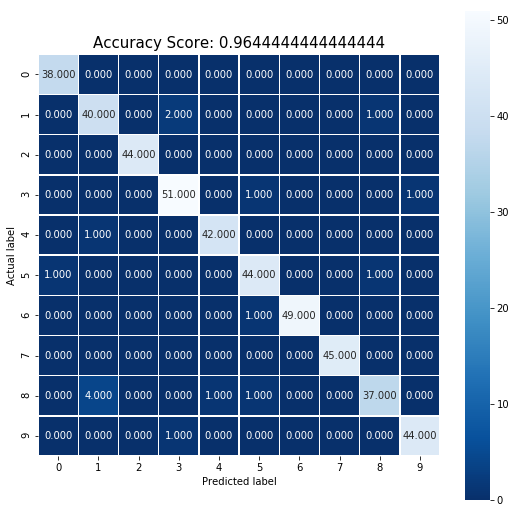

In [14]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {}".format(score)
plt.title(all_sample_title, size=15)

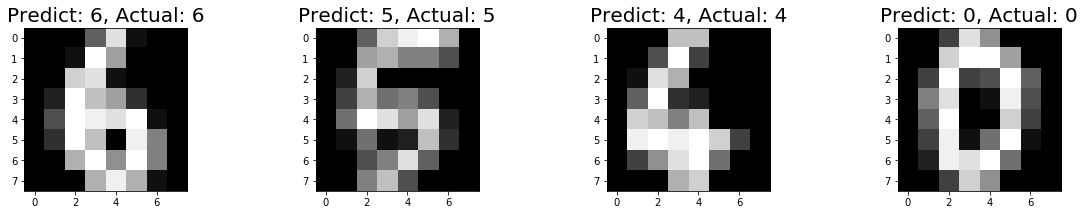

In [15]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1

plt.figure(figsize = (20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predict: {}, Actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize=20)